# IRIS FLOWER CLASSIFICATION
## PROJECT BY BENSON KINYUA


# BUSINESS UNDERSTANDING

## Overview:
The Iris Flower Classification project aims to develop a data-driven solution for accurately categorizing iris flowers based on their botanical features. This project holds significance in various domains such as botany, agriculture, and environmental studies, where accurate identification of iris species can aid in research, conservation efforts, and horticultural practices. By leveraging machine learning techniques, this project seeks to automate the classification process, providing a reliable and efficient means of identifying iris species.

## Problem Statement:
Manual classification of iris flowers based on morphological attributes can be time-consuming and prone to human errors. The Iris Flower Classification project addresses this challenge by employing machine learning algorithms to automate the classification process. The primary goal is to develop a model capable of accurately identifying iris species based on features like sepal length, sepal width, petal length, and petal width.

## Business Objectives:

* Accuracy Improvement: Develop a classification model with high accuracy to ensure reliable identification of iris species.
* Efficiency Enhancement: Automate the classification process to save time and resources compared to manual identification methods.
* Scalability: Create a scalable solution capable of handling large volumes of iris data for real-time or batch processing.
* Generalizability: Develop a model that can generalize well to unseen iris samples, ensuring robust performance across diverse datasets.
* Interpretability: Strive for model interpretability to provide insights into the features driving classification decisions, aiding in botanical research and analysis.
## Stakeholders:

* Botanists and Biologists: Require accurate species identification for research, conservation, and ecological studies.
* Agriculturalists and Horticulturists: Benefit from precise classification for breeding programs, cultivation, and crop management.
* Environmental Organizations: Rely on accurate identification for monitoring and preservation efforts of iris species in natural habitats.
* Data Scientists and Machine Learning Engineers: Responsible for developing, optimizing, and deploying the classification model.
## Success Criteria:

* Accuracy Score: Achieve a high classification accuracy score, preferably exceeding 95%, to ensure reliable species identification.
* Model Efficiency: Develop a model with low computational overhead, enabling efficient processing of large datasets.
* Real-world Applicability: Demonstrate the model's effectiveness in real-world scenarios by successfully classifying iris species from diverse datasets.
* User Satisfaction: Gather feedback from stakeholders to ensure the model meets their requirements and expectations.
* Adaptability: Ensure the model can adapt to changes in data distribution or feature importance, maintaining its performance over time.

## Data Understanding:
The data set is available at https://archive.ics.uci.edu/ml/datasets/iris, the errors are modified as well. It consists the following information for 150 samples,

1. sepal length (in cm)
2. sepal width (in cm)
3. petal length (in cm)
4. petal width (in cm)
5. class:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

### Import required libraries:

In [31]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split


from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
# reading the dataset
iris = pd.read_csv('Iris.csv')

# first five rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# shape of the dataset
print("The dataset has {} rows and {} features".format(iris.shape[0],iris.shape[1]))

The dataset has 150 rows and 5 features


In [10]:
# Info of the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* We can see that there is no null values in the dataset.


In [11]:
#printing statistics about the dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# checking for null values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

* The dataset has no null values.


In [13]:
# value counts of species
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

* Each class of iris flowers consists of 50 samples each.

* The three species are Iris setosa, Iris versicolor, and Iris virginica.

In [15]:
#categories of flowers we have?
print(" we have {} types of species in this dataset".format(iris.species.nunique()))
print("the names of this species are:",iris.species.unique())

 we have 3 types of species in this dataset
the names of this species are: ['setosa' 'versicolor' 'virginica']


## Exploratory Data Analysis:


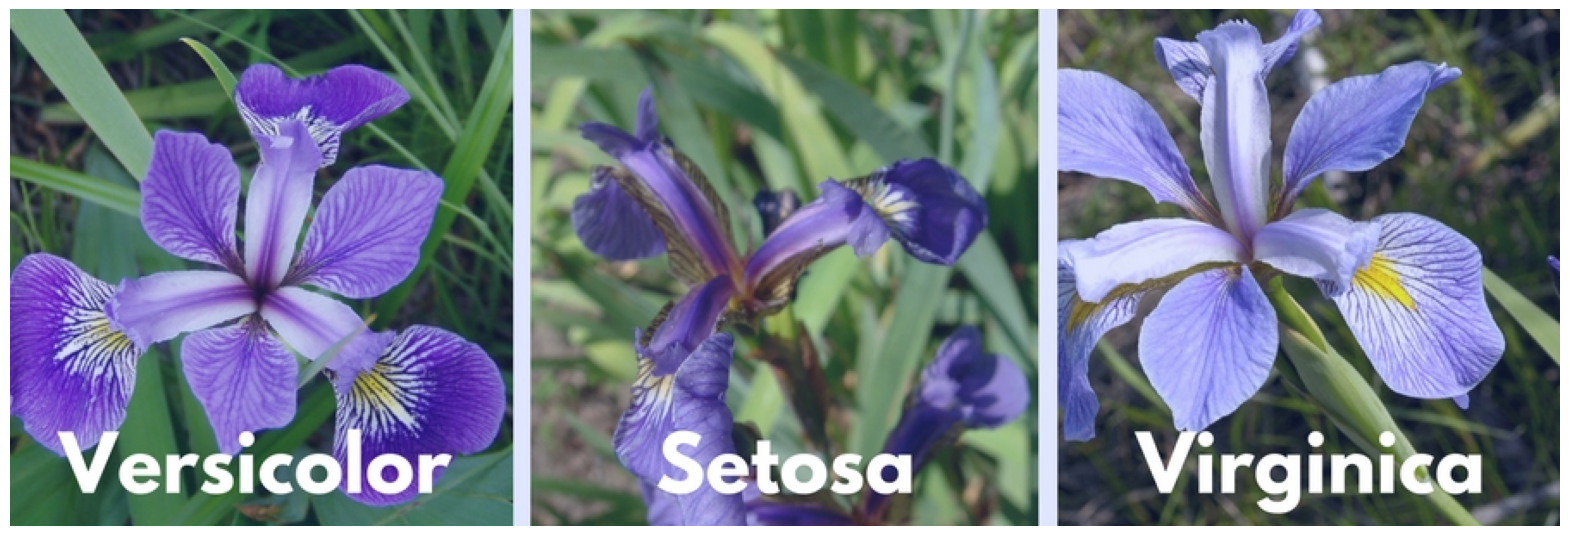

In [6]:
%matplotlib inline
# plotting the species
img=mpimg.imread('iris_types.jpg')
plt.figure(figsize=(20,40))
plt.axis('off')
plt.imshow(img);

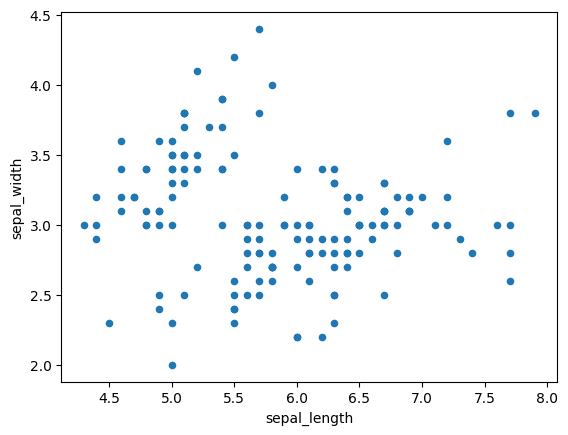

In [16]:
# 2d scatter plot

iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

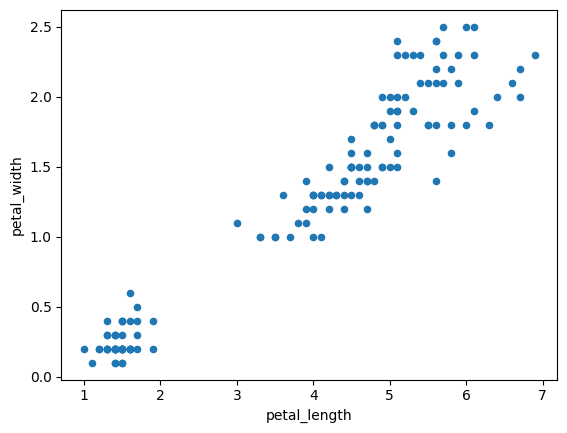

In [18]:
# comparing petal length and width
iris.plot(kind='scatter', x='petal_length', y='petal_width') ;
plt.show()

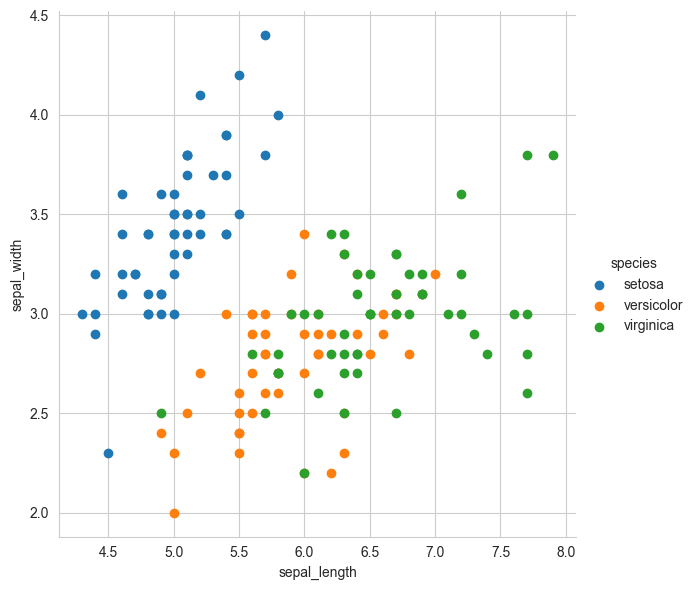

In [21]:
# Scatter plot with color-coding for each flower type/class.
sns.set_style("whitegrid")
sns.FacetGrid(data=iris, hue="species", height=6)\
   .map(plt.scatter, "sepal_length", "sepal_width")\
   .add_legend()

plt.show()

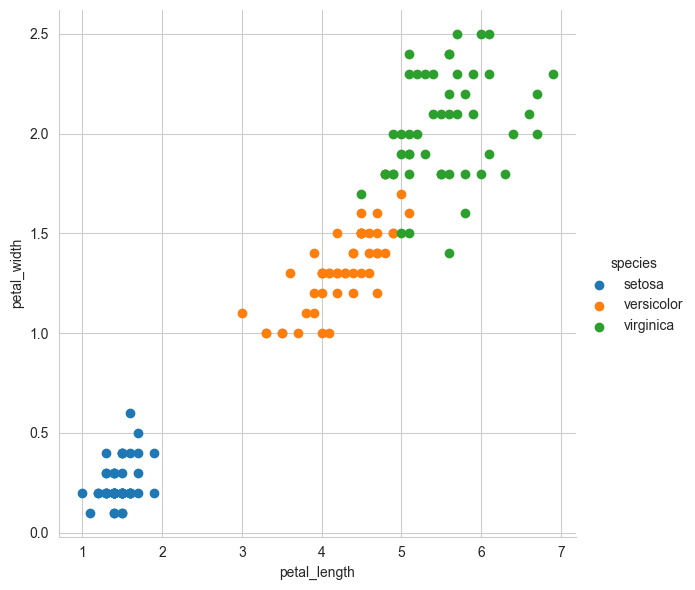

In [22]:
# comparing petal length and width
sns.set_style("whitegrid")
sns.FacetGrid(data=iris,hue="species",height=6)\
   .map(plt.scatter,"petal_length","petal_width")\
   .add_legend()
plt.show()

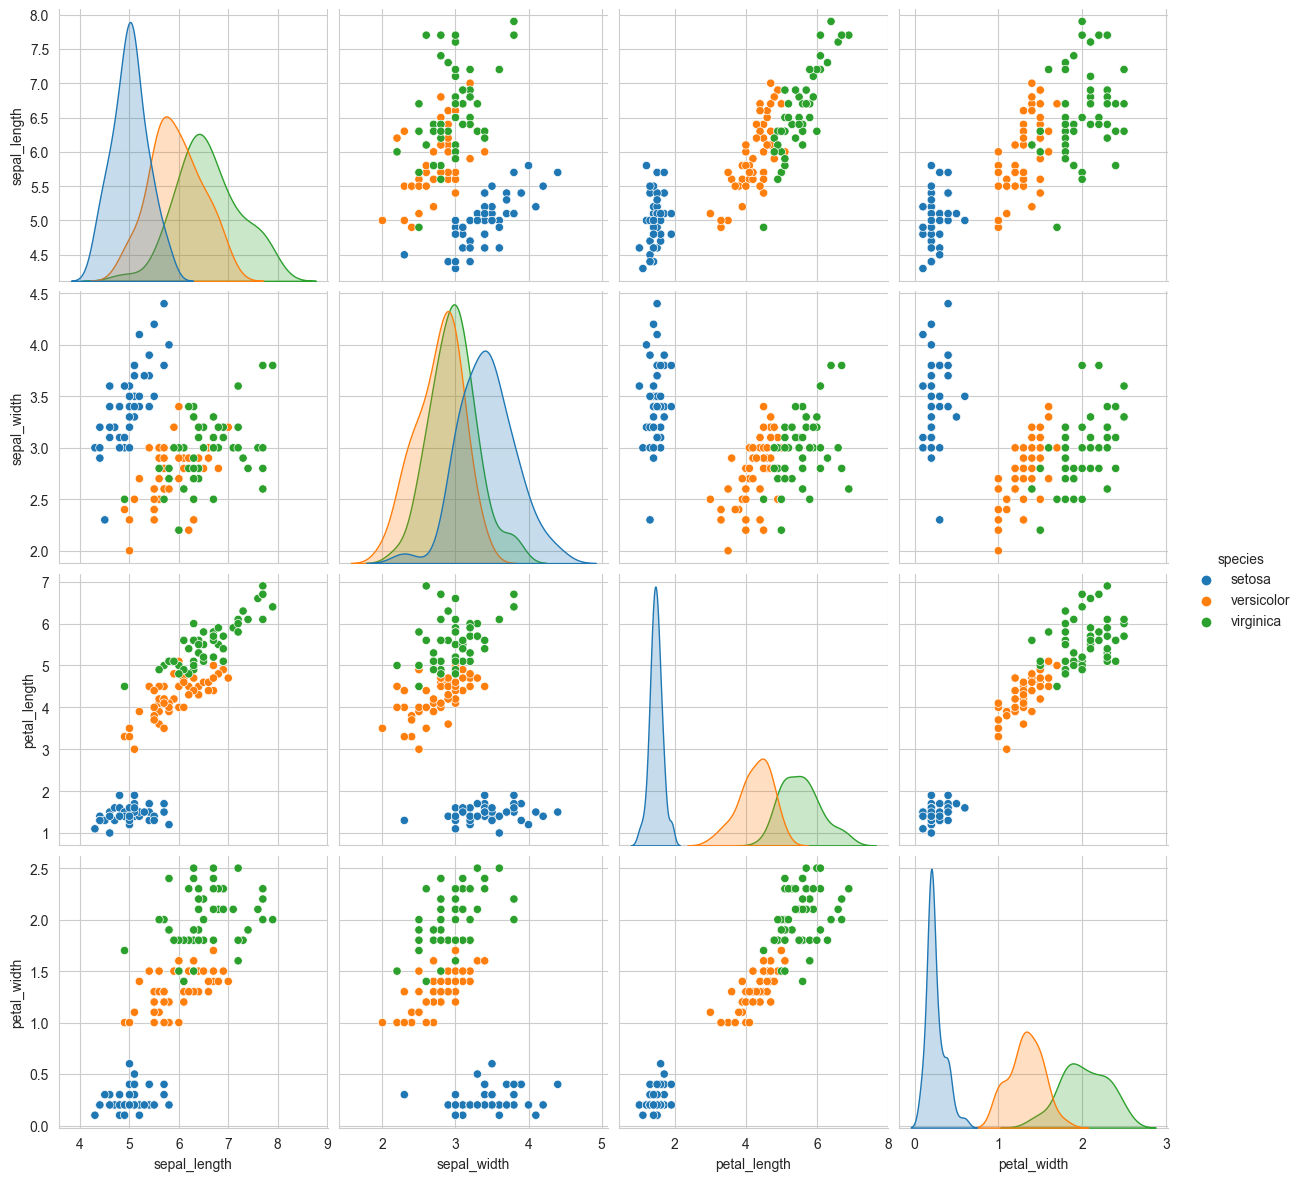

In [23]:
# pair plot
sns.pairplot(iris, hue="species", height=3)
plt.show()

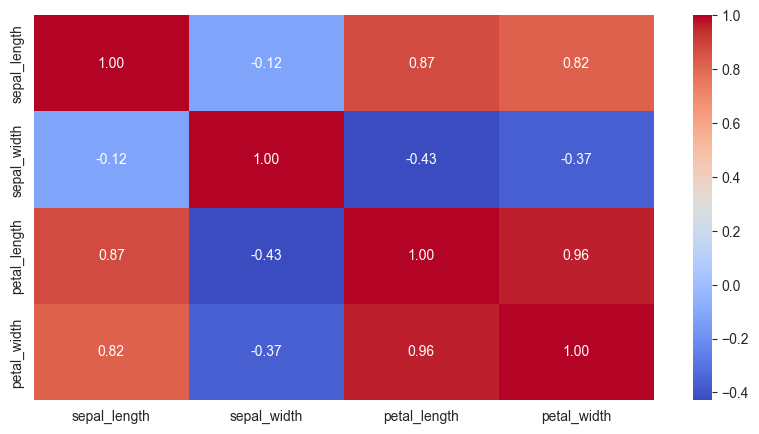

In [30]:
#Let's check if we have any correlation between features

# Remove the 'species' column from the correlation matrix
iris_corr = iris.drop(columns=['species']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 5)) 
sns.heatmap(iris_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

### Split datset into train and test sets:

Let us split the dataset into 70% data for training and 30% of data for testing.


In [32]:
# selecting X and y variables
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)



Train set: (105, 4) (105,)
Test set: (45, 4) (45,)


### Normalize the feature set X_train and X_test:

In [35]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[0:5]
X_test[0:5]

array([[-1.59685338,  0.29978535, -1.40012998, -1.35832791],
       [-1.59685338,  0.06311271, -1.34240967, -1.35832791],
       [-0.58067396,  0.77313064, -1.34240967, -1.09198911],
       [-1.08876367, -0.17355994, -1.28468935, -1.35832791],
       [-0.19960667,  3.1398571 , -1.34240967, -1.09198911]])

## Function to plot the confusion matrix:

Function that plots the confusion matrix for the classification models. The predicted values, yhat from each model is given as an argument to the plot function.

# Modeling

## Logistic Regression:


In [38]:
# logistic regression
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression()

# fit the model
logreg.fit(X_train, y_train)

# predict on the test data
y_pred = logreg.predict(X_test)

# accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


This indicates that the logistic regression classifier achieved a high accuracy score of 0.98 on the test set, demonstrating its effectiveness in accurately classifying instances into their respective classes.

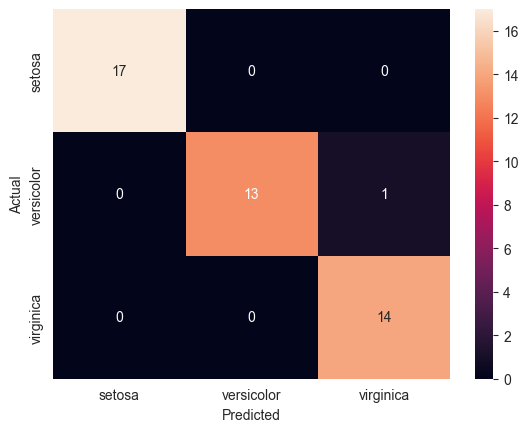

In [42]:
#Plot the confusion matrix.
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [44]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.93      0.96        14
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## K-Nearest Neighbors Classifier:


In [45]:
# import k-neighbors
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors = 3)

# fit the model
knn.fit(X_train, y_train)

# predict on the test data
y_pred = knn.predict(X_test)

# accuracy
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on test set: 0.93


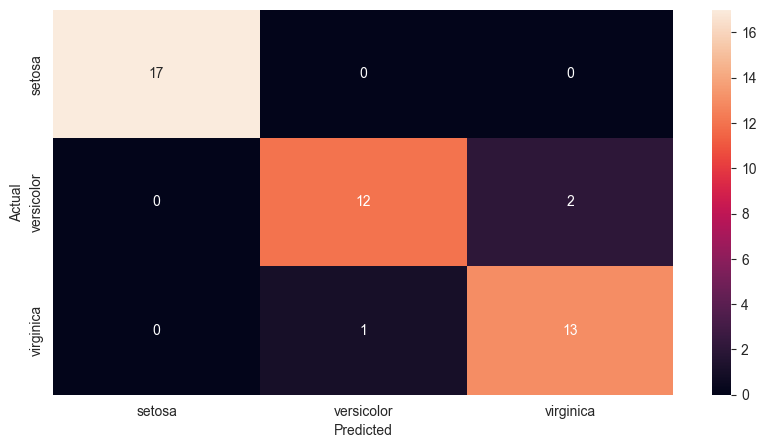

In [46]:
# Plot the confusion matrix.
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

## Decision Tree:<a name="decision-tree"></a>

In [47]:
# import decision tree
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
dtree = DecisionTreeClassifier()

# fit the model
dtree.fit(X_train, y_train)

# predict on the test data
y_pred = dtree.predict(X_test)

# accuracy
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.98


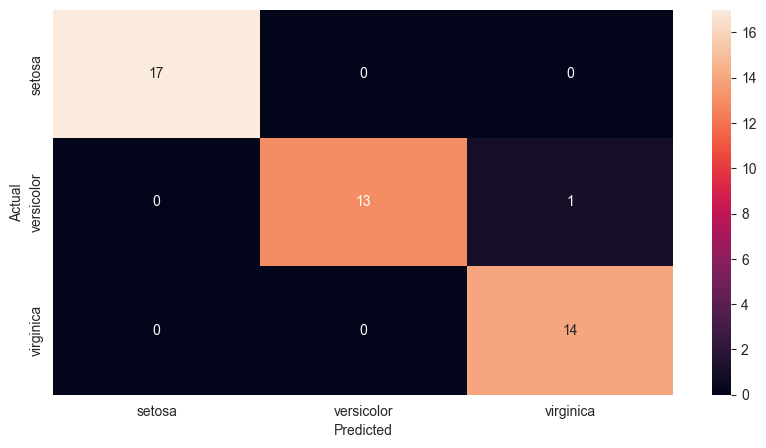

In [48]:
# Plot the confusion matrix.
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

## Support Vector Machine:<a name="SVM"></a>

In [49]:
# import svm
from sklearn.svm import SVC

# instantiate the model
svm = SVC()

# fit the model
svm.fit(X_train, y_train)

# predict on the test data
y_pred = svm.predict(X_test)

# accuracy
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.93


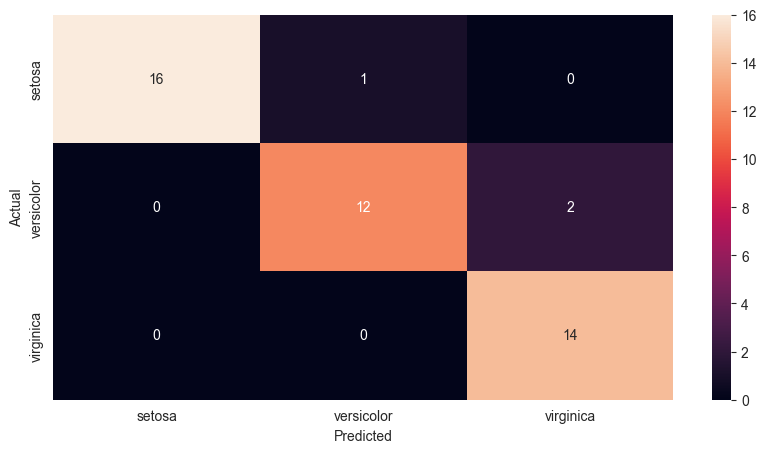

In [50]:
# Plot the confusion matrix.
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [51]:
# random forest
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
rf = RandomForestClassifier()

# fit the model
rf.fit(X_train, y_train)

# predict on the test data
y_pred = rf.predict(X_test)

# accuracy
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.96


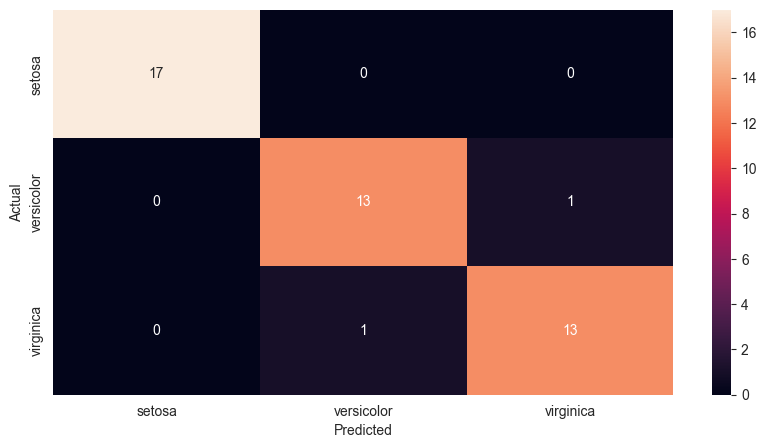

In [52]:
# Plot the confusion matrix.
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

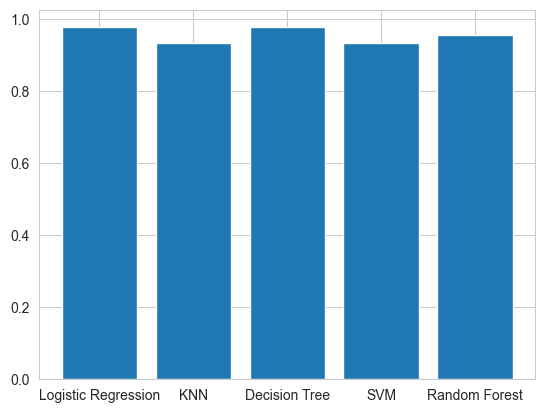

,Model,Accuracy
0,Logistic Regression,0.977778
1,KNN,0.933333
2,Decision Tree,0.977778
3,SVM,0.933333
4,Random Forest,0.955556


In [54]:
# plotting all the models and their accuracy
import matplotlib.pyplot as plt
models = [logreg, knn, dtree, svm, rf]
accuracy = []
for model in models:
    accuracy.append(model.score(X_test, y_test))
plt.bar(['Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest'], accuracy)
plt.show()

# table for the models and their accuracy
pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest'],
              'Accuracy': accuracy})


In [56]:
# create pickle file for logistic regression model
import pickle
pickle.dump(logreg, open('model.pkl', 'wb'))

# load the model
loaded_model = pickle.load(open('model.pkl', 'rb'))

# predict on the test data
y_pred = loaded_model.predict(X_test)

# accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [55]:
# saving the logistic regression model in a pickle file
import pickle
filename = 'finalized_model.sav'
pickle.dump(logreg, open(filename, 'wb'))


## Conclusion:

The Iris Flower Classification project has successfully developed and evaluated several machine learning models to automate the process of identifying iris species based on botanical features. Among the models tested, logistic regression emerged as the most effective, achieving an impressive accuracy score of 0.98 on the test dataset. This high accuracy demonstrates the robustness and reliability of the logistic regression model in accurately classifying iris flowers.

The achievement of a 98% accuracy rate indicates that the logistic regression model can be deployed with confidence in real-world applications, such as botanical research, conservation efforts, and horticultural practices. By automating the classification process, this model streamlines tasks that were previously labor-intensive and prone to human error, thus saving time and resources while improving the accuracy of species identification.

## Recommendations:

* Further Evaluation and Validation: Despite the high accuracy achieved by the logistic regression model, it is essential to conduct further evaluation and validation on additional datasets to ensure its generalizability and robustness across diverse scenarios. This includes testing the model on unseen data collected from different geographical locations or under varying environmental conditions.

* Feature Importance Analysis: Conduct an in-depth analysis of feature importance to understand the contributions of different botanical features (e.g., sepal length, sepal width, petal length, petal width) to the classification process. This analysis can provide valuable insights into the morphological characteristics that are most indicative of iris species, aiding in botanical research and taxonomy studies.

* Model Interpretability: Enhance the interpretability of the logistic regression model by visualizing decision boundaries, coefficients, and probability distributions. This enables stakeholders, including botanists, researchers, and policymakers, to gain a deeper understanding of how the model makes classification decisions and to interpret its outputs accurately.

* Integration with Botanical Databases: Integrate the logistic regression model into existing botanical databases and information systems to support automated species identification and data management. This integration enhances the efficiency of botanical research, facilitates data-driven decision-making, and contributes to the advancement of biodiversity conservation efforts.

* Continuous Monitoring and Maintenance: Implement a system for continuous monitoring and maintenance of the logistic regression model to ensure its performance remains optimal over time. This includes periodic updates, retraining on new data, and monitoring for concept drift or changes in data distribution that may affect model performance.